# KMeans Family Examples

Examples for centroid-based clustering, covering standard KMeans, MiniBatchKMeans, and BisectingKMeans with deterministic seeds.

## Setup

We import NumPy and Clustor, configure NumPy printing for readability, and create a small dataset with two obvious clusters.

In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

root = Path.cwd()
if not (root / "python").exists():
    for parent in root.parents:
        if (parent / "python").exists():
            root = parent
            break

sys.path.insert(0, str(root / "python"))

import clustor  # noqa: E402

np.set_printoptions(precision=6, suppress=True)

X = np.array(
    [
        [0.0, 0.0],
        [0.0, 1.0],
        [1.0, 0.0],
        [10.0, 10.0],
        [10.0, 11.0],
        [11.0, 10.0],
    ],
    dtype=np.float64,
)

X

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [10., 10.],
       [10., 11.],
       [11., 10.]])

## KMeans

Fit KMeans with deterministic initialization and inspect centers and labels.

In [2]:
km = clustor.KMeans(n_clusters=2, n_init=1, max_iter=50, random_state=0)
km_out = km.fit(X)
km_out["centers"]

array([[10.333333, 10.333333],
       [ 0.333333,  0.333333]])

In [3]:
km_out["labels"]

array([1, 1, 1, 0, 0, 0])

## MiniBatchKMeans

Use MiniBatchKMeans for faster updates on streaming data.

In [4]:
mb = clustor.MiniBatchKMeans(n_clusters=2, batch_size=3, max_steps=200, random_state=0)
mb_out = mb.fit(X)
mb_out["centers"]

array([[10.374126, 10.300699],
       [ 0.33121 ,  0.321656]])

In [5]:
mb.predict(X)

array([1, 1, 1, 0, 0, 0])

## BisectingKMeans

BisectingKMeans splits clusters hierarchically to reach the target cluster count.

In [6]:
bk = clustor.BisectingKMeans(n_clusters=2, n_init=1, max_iter=50, random_state=0)
bk_out = bk.fit(X)
bk_out["centers"]

array([[10.333333, 10.333333],
       [ 0.333333,  0.333333]])

In [7]:
bk.predict(X)

array([1, 1, 1, 0, 0, 0])

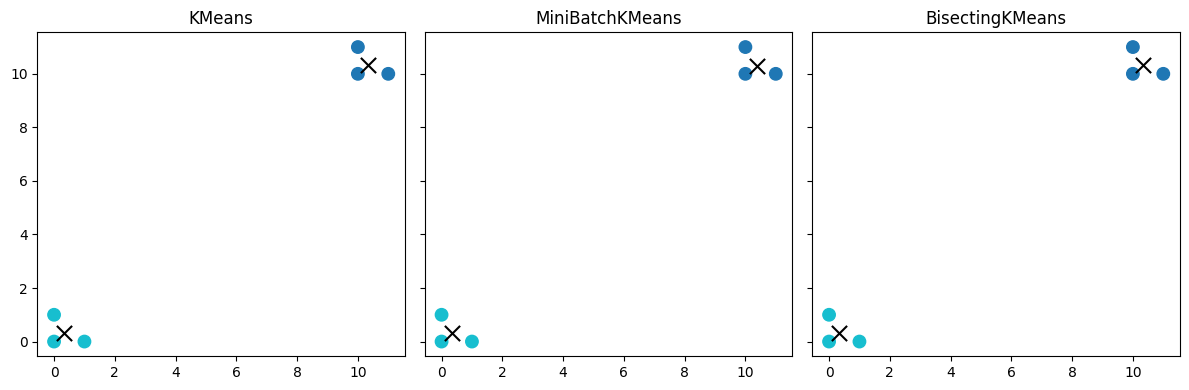

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
axes[0].scatter(X[:, 0], X[:, 1], c=km_out["labels"], cmap="tab10", s=80)
axes[0].scatter(
    km_out["centers"][:, 0], km_out["centers"][:, 1], c="black", marker="x", s=120
)
axes[0].set_title("KMeans")
mb_labels = mb.predict(X)
axes[1].scatter(X[:, 0], X[:, 1], c=mb_labels, cmap="tab10", s=80)
axes[1].scatter(
    mb_out["centers"][:, 0], mb_out["centers"][:, 1], c="black", marker="x", s=120
)
axes[1].set_title("MiniBatchKMeans")
bk_labels = bk.predict(X)
axes[2].scatter(X[:, 0], X[:, 1], c=bk_labels, cmap="tab10", s=80)
axes[2].scatter(
    bk_out["centers"][:, 0], bk_out["centers"][:, 1], c="black", marker="x", s=120
)
axes[2].set_title("BisectingKMeans")
plt.tight_layout()